In [1]:
## Create a tmp file containing only the lines containing "Bilayer Surface Tension" and the corresponding values

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
# Change the default pyplot parameters to put a readable size of text
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:

labels = []
files = glob.glob('Results/lipid6FracTest/*/dmpcas.*')
tmp_files = []
for i in range(len(files)):
    labels.append(str(files[i].strip().split('/')[0:3]).strip().split('_')[-1][:-2])
    tmp_files.append(str(str(('/').join(files[i].split('/')[0:3])) + '/' + str(files[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files[i]):
        os.system(f'rm { tmp_files[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files[i], tmp_files[i]))

labelValue = {}
for i in range(len(files)):
    with open(tmp_files[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,60,3):
            goodLines.append(float(localLines[ind]))
        labelValue[labels[i]] = goodLines

In [3]:
BST_df = pd.DataFrame.from_dict(labelValue, orient='columns').drop([0,1,2,3,4])

In [4]:
is_close_to_0 = (BST_df.mean()<0.5) & (BST_df.mean()>-0.5) 
display((BST_df.iloc[:,is_close_to_0.values].mean()).sort_values())

1.1404412   -0.215505
1.1382353    0.005883
1.1338235    0.165181
1.1316176    0.347014
1.1272059    0.356064
dtype: float64

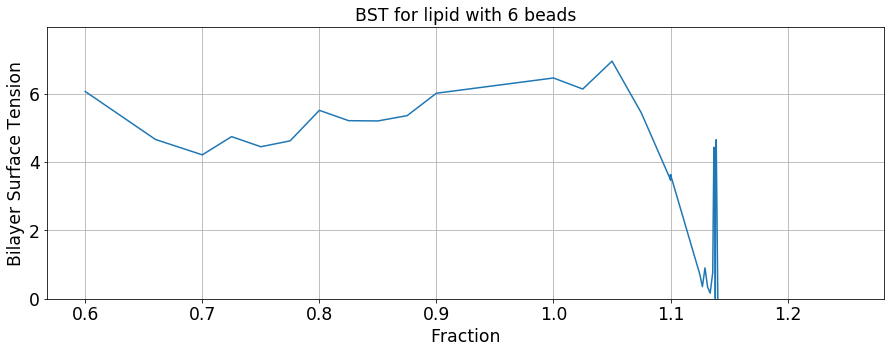

In [6]:
BST_df2=BST_df
test = []
for col in BST_df2.columns:
    test.append(float(col))
BST_df2.columns = test
test.sort()
BST_df2 = BST_df2[test]

plt.plot(BST_df2.columns, BST_df2.mean())
plt.xlabel('Fraction')
plt.ylabel('Bilayer Surface Tension')
plt.grid()
plt.ylim([0, BST_df2.mean().max()+1])
plt.title('BST for lipid with 6 beads');
plt.savefig('Results/lipid6FracTest/lipid6_noSL.png')

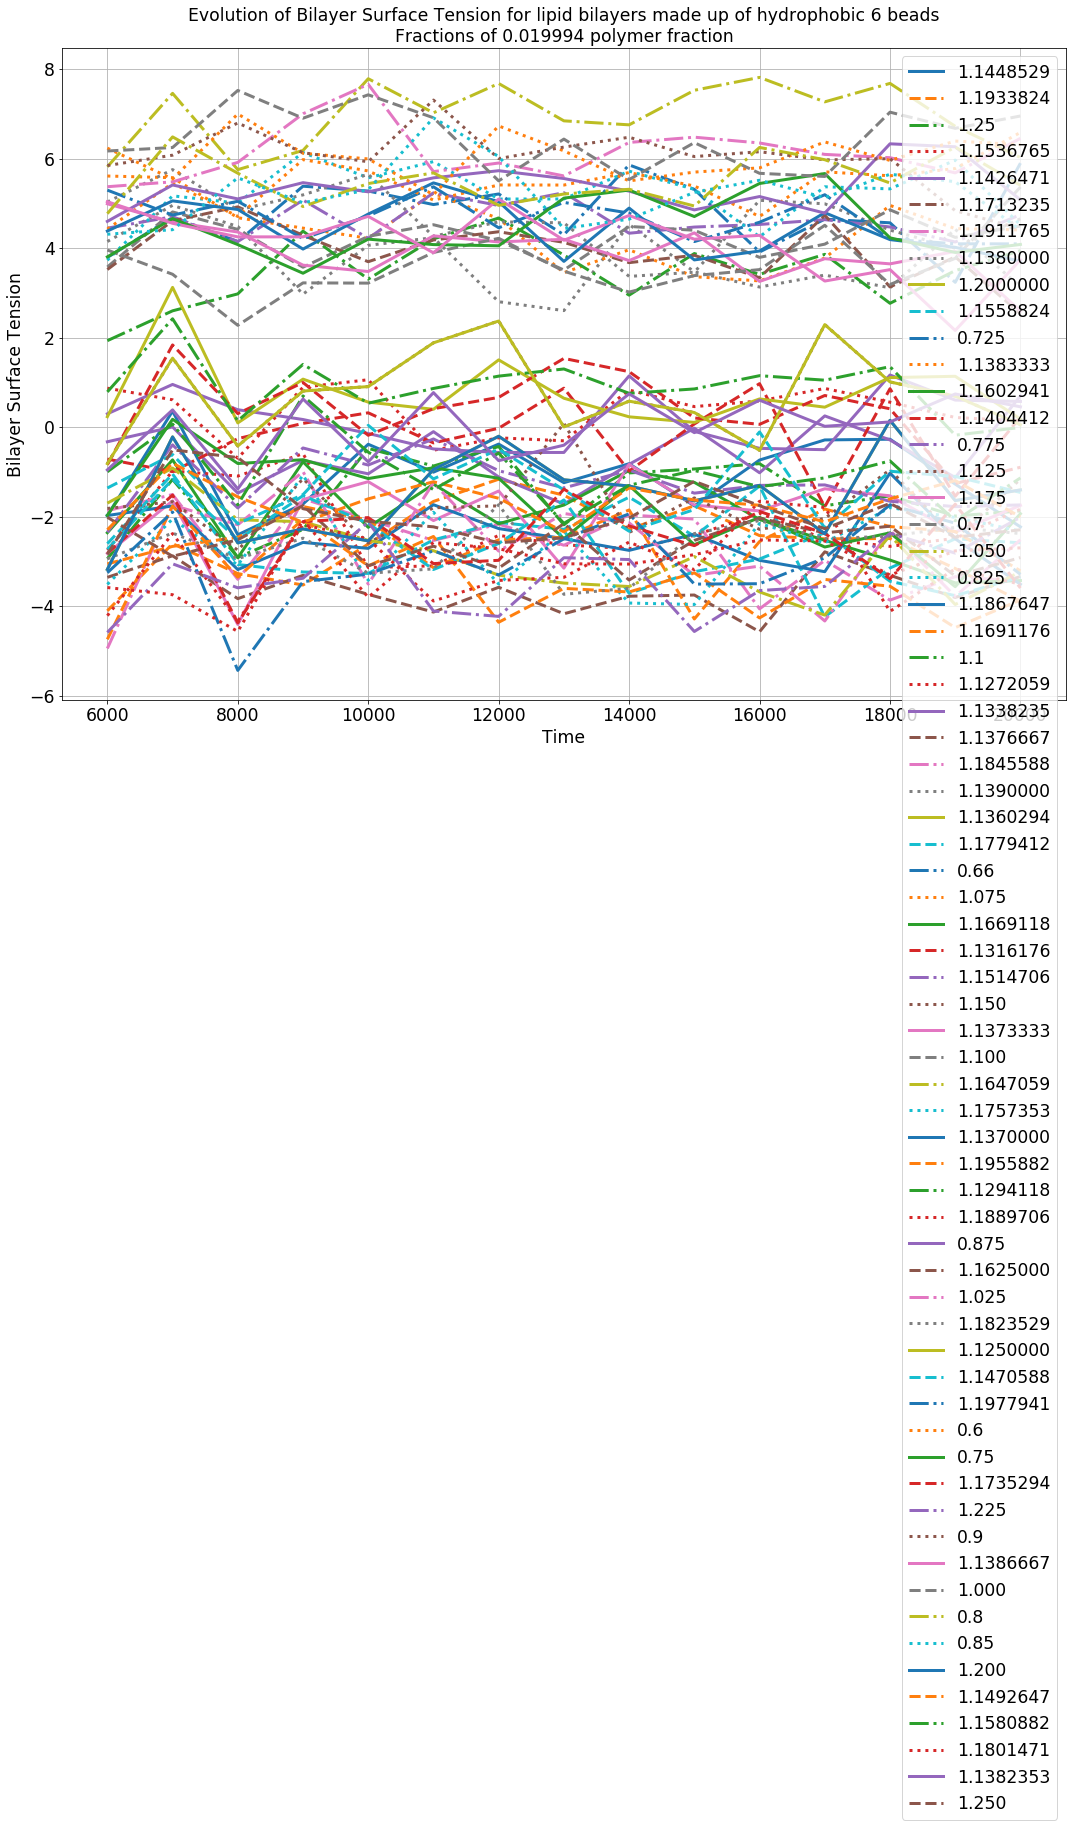

In [5]:
x_axis = list(range(1000, 21000, 1000))

# Changes the line type for each lines
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

plt.figure(figsize=(18,12))
for label in labels:
    plt.plot(x_axis[5:], labelValue[label][5:], next(linecycler), linewidth=3)
plt.legend(labels)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Bilayer Surface Tension')
plt.title('Evolution of Bilayer Surface Tension for lipid bilayers made up of hydrophobic 6 beads\nFractions of 0.019994 polymer fraction')
plt.show()

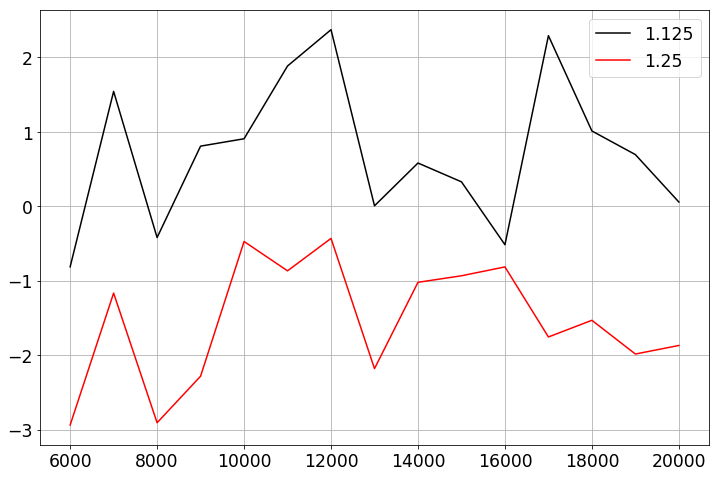

In [6]:
plt.figure(figsize=(12,8))
plt.plot(x_axis[5:],labelValue['1.125'][5:], 'k', x_axis[5:], labelValue['1.25'][5:], 'r')
plt.grid()
plt.legend(['1.125','1.25'])
plt.show()

In [7]:
labelMean = pd.DataFrame.from_dict(labelValue, orient='columns')
labelMean = (labelMean.drop([0,1,2,3,4])).mean()
display(labelMean[(labelMean>-0.5)][labelMean<0.5].sort_values())

1.1404412   -0.215505
1.1382353    0.005883
1.1338235    0.165181
1.1316176    0.347014
1.1272059    0.356064
dtype: float64

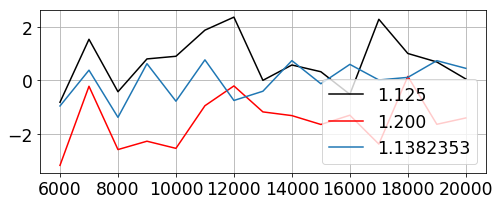

AttributeError: 'list' object has no attribute 'mean'

In [8]:
plt.figure(figsize=(8,3))
plt.plot(x_axis[5:],labelValue['1.125'][5:], 'k', x_axis[5:], labelValue['1.200'][5:], 'r', x_axis[5:],labelValue['1.1382353'][5:])
plt.grid()
plt.legend(['1.125','1.200','1.1382353'])
plt.show()

display('Mean 1.125: {:5f}'.format(labelValue['1.125'][5:].mean()))
display('Mean 1.200: {:.5f}'.format(labelValue['1.200'][5:].mean()))
display('Mean 1.1382353: {:.5f}'.format(labelValue['1.1382353'][5:].mean()))


Thus, we'll now want to iterate between 1.125 and 1.200, until the value of label Mean reach roughly 0.1, as recommended by the teacher.

After more tests, we can see that 1.1382353 gives us a mean Bilayer Surface Tension of 0.00588, which is good enough for us!